# Actividad : Caida de un paracaídista.

Disenar un programa que permita encontrar la posición y velocidad como función del tiempo para estudiar el movimiento de un paracaidista que desciende desde una altura h.



Para su estudio emplea el metodo de euler, ten presente las siguientes consideraciones para el modelo:


\begin{align*}
    \sum F_y &= ma \\
    mg - f_s &= ma \\
    \frac{d^2 y}{dt^2} + \frac{f_s}{m} + g &= 0
\end{align*}


Con el metodo de euler construyamos dos ecuaciones diferenciales de primer orden:

\begin{align*}
    \frac{dy}{dt} &= v \quad \Rightarrow \quad \frac{dy}{dt} = f(t, y)
\end{align*}


\begin{align*}
    \frac{dv}{dt} &= -g-\frac{f_s}{m} \quad \Rightarrow \quad \frac{dz}{dt} = g(t, y)
\end{align*}


In [6]:
import numpy as np
import matplotlib.pylab as plt

In [126]:
def fun(t, y, params):
    fs = params[0]
    g = params[1]
    m = params[2]
    dydt = y[1]
    dwdt = -fs/m*y[1] - g
    return np.array([dydt, dwdt])

In [127]:
h0 = 5000.0 #Posicion 
v0 = 1E-10   #Velocidad
y0 = np.array([h0, v0]) # Condicion inicial
params=(0.1, 9.8, 0.6)
dt = 0.1
N1 = 1000
time = np.linspace(0, 10, N1)
N = len(time)
y = np.zeros((N, 2))
y[0] = np.array([h0,v0])  

for i in range(0, N-1):
    t=i
    y[i+1] = y[i] + dt * fun(t, y[i], params)

Text(0, 0.5, 'v')

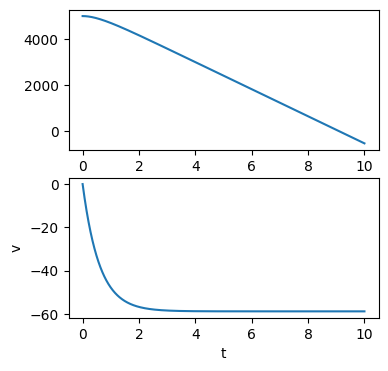

In [128]:
fig, axs  = plt.subplots(nrows=2, ncols=1, figsize=(4, 4))
ax=axs.flatten()
ax[0].plot(time, y[:,0])
ax[1].plot(time, y[:,1])
plt.xlabel("t")
plt.ylabel("v")